**STEP 1:** Loading and Inspecting the Dataset

In [108]:
import pandas as pd

#Here we will Load the dataset
df = pd.read_csv("/content/PCOS_data.csv")


print(df.head())

# Checking shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

In [109]:
#Removing leading/trailing spaces from column names
df.columns = df.columns.str.strip()

#Droping irrelevant columns
df.drop(columns=["Sl. No", "Patient File No.", "Unnamed: 44"], inplace=True, errors='ignore')

#Confirming changes
print("Cleaned Columns:", df.columns.tolist())


Cleaned Columns: ['PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [110]:
# Handling  missing values
df["Marraige Status (Yrs)"] = df["Marraige Status (Yrs)"].fillna(df["Marraige Status (Yrs)"].median())
df["Fast food (Y/N)"] = df["Fast food (Y/N)"].fillna(df["Fast food (Y/N)"].mode()[0])


In [111]:
# Fixing Cycle(R/I) encoding: 2 = Regular (R), 4 = Irregular (I)
df["Cycle(R/I)"] = df["Cycle(R/I)"].replace({2: "R", 4: "I"})


In [112]:
#Converting to numeric (force errors to NaN)
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")

#Now filling missing values with the median
df["II    beta-HCG(mIU/mL)"] = df["II    beta-HCG(mIU/mL)"].fillna(df["II    beta-HCG(mIU/mL)"].median())

#Repeating same cleaning logic for AMH if needed
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")
df["AMH(ng/mL)"] = df["AMH(ng/mL)"].fillna(df["AMH(ng/mL)"].median())



In [113]:
print(df["Cycle(R/I)"].value_counts())


Cycle(R/I)
R    390
I    150
5      1
Name: count, dtype: int64


In [114]:
#Totaling missing values
print("Total missing values:", df.isnull().sum().sum())

#Missing values per column
print("Missing values by column:")
print(df.isnull().sum())


Total missing values: 0
Missing values by column:
PCOS (Y/N)                0
Age (yrs)                 0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           

**STEP 2:** Data Cleaning and Transformation

In [115]:
#Droping rows with more than 25% missing values
threshold = len(df.columns) * 0.75
df = df.dropna(thresh=threshold)

#Imputing remaining missing numerical values with column mean
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())


In [116]:
#Identifying all Y/N columns manually or dynamically
yn_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].isin(['Y', 'N']).any()]

#Converting Y/N to 1/0
df[yn_cols] = df[yn_cols].replace({'Y': 1, 'N': 0})


In [117]:
#Fixing Categorical Issues
#df['Cycle(R/I)'] = df['Cycle(R/I)'].map({'R': 0, 'I': 1})



In [118]:
#Confirming datatypes
print(df.dtypes)

#Checking for any remaining non-numeric columns
non_numeric = df.select_dtypes(exclude='number')
print("Non-numeric columns after cleanup:", non_numeric.columns.tolist())


PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                 object
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [119]:
df["Cycle(R/I)"] = df["Cycle(R/I)"].map({'R': 0, 'I': 1})



In [120]:
df["Cycle(R/I)"].fillna(df["Cycle(R/I)"].mode()[0], inplace=True)


<ipython-input-120-0f696c1aaf1a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cycle(R/I)"].fillna(df["Cycle(R/I)"].mode()[0], inplace=True)


In [121]:
#Fixing the non-numeric columns
#non_numeric_cols = ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

#for col in non_numeric_cols:
#    df[col] = pd.to_numeric(df[col], errors='coerce')


In [122]:
#Confirming datatypes
print(df.dtypes)

#Checking for any remaining non-numeric columns
non_numeric = df.select_dtypes(exclude='number')
print("Non-numeric columns after cleanup:", non_numeric.columns.tolist())

PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

**STEP 3:** Exploratory Data Analysis (EDA)

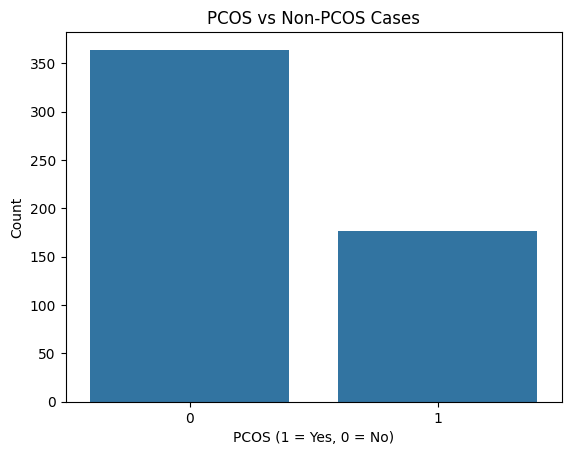

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of PCOS vs non-PCOS cases
sns.countplot(x='PCOS (Y/N)', data=df)
plt.title('PCOS vs Non-PCOS Cases')
plt.xlabel('PCOS (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


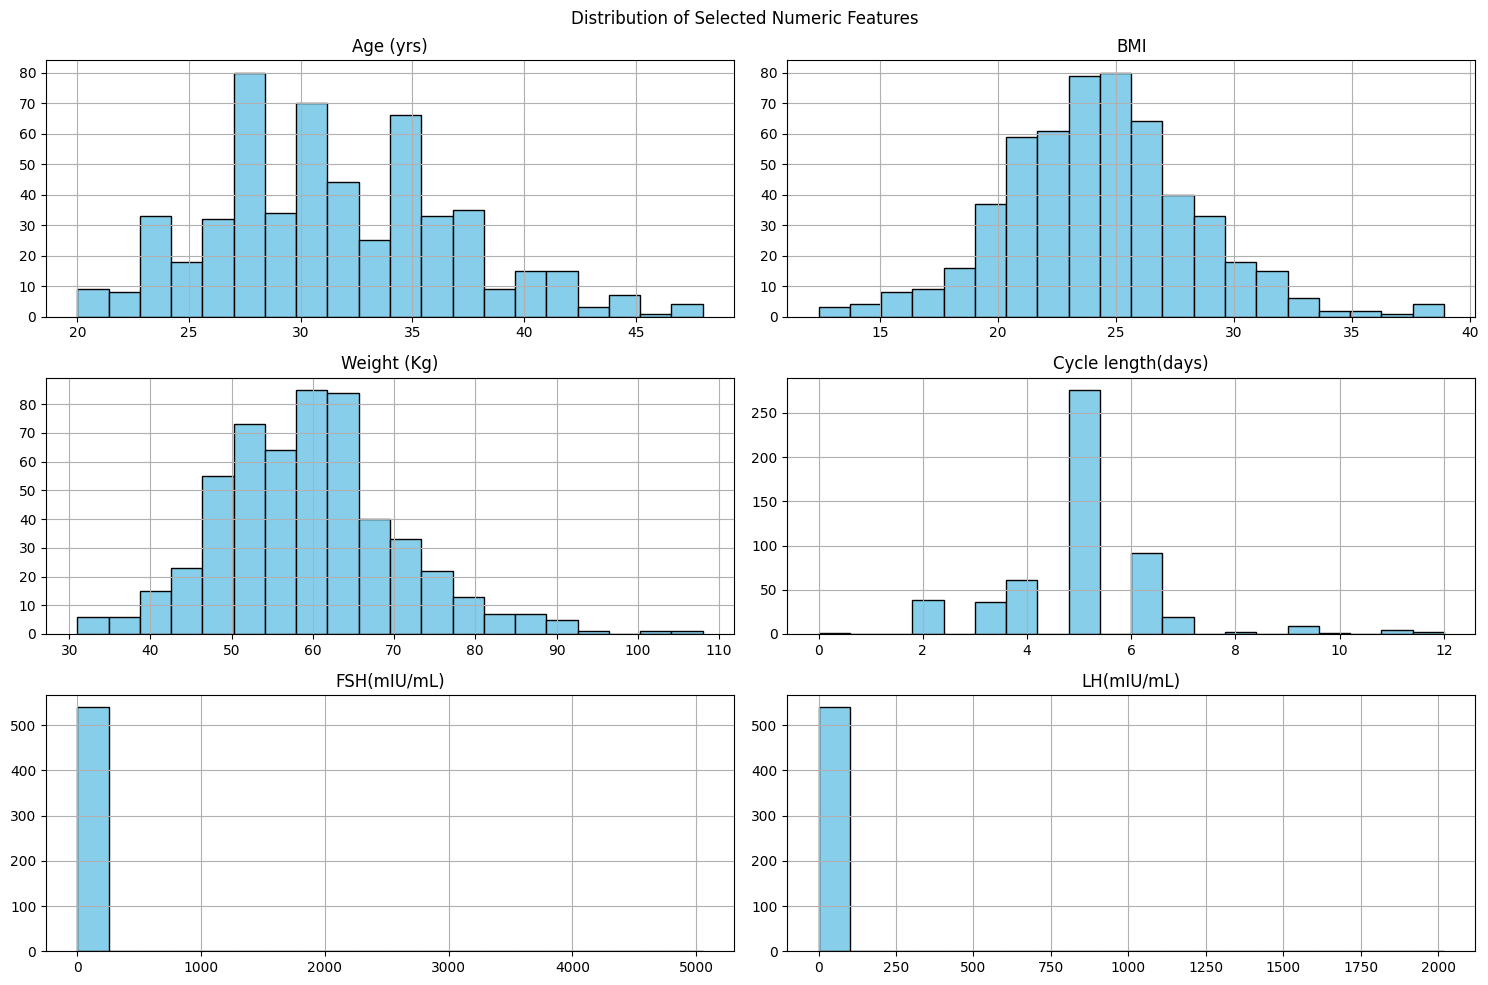

In [124]:
#Example of distribution plots for numeric features
numeric_features = ['Age (yrs)', 'BMI', 'Weight (Kg)',
                    'Cycle length(days)', 'FSH(mIU/mL)', 'LH(mIU/mL)']

df[numeric_features].hist(bins=20, figsize=(15, 10),
                          color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Selected Numeric Features')
plt.tight_layout()
plt.show()


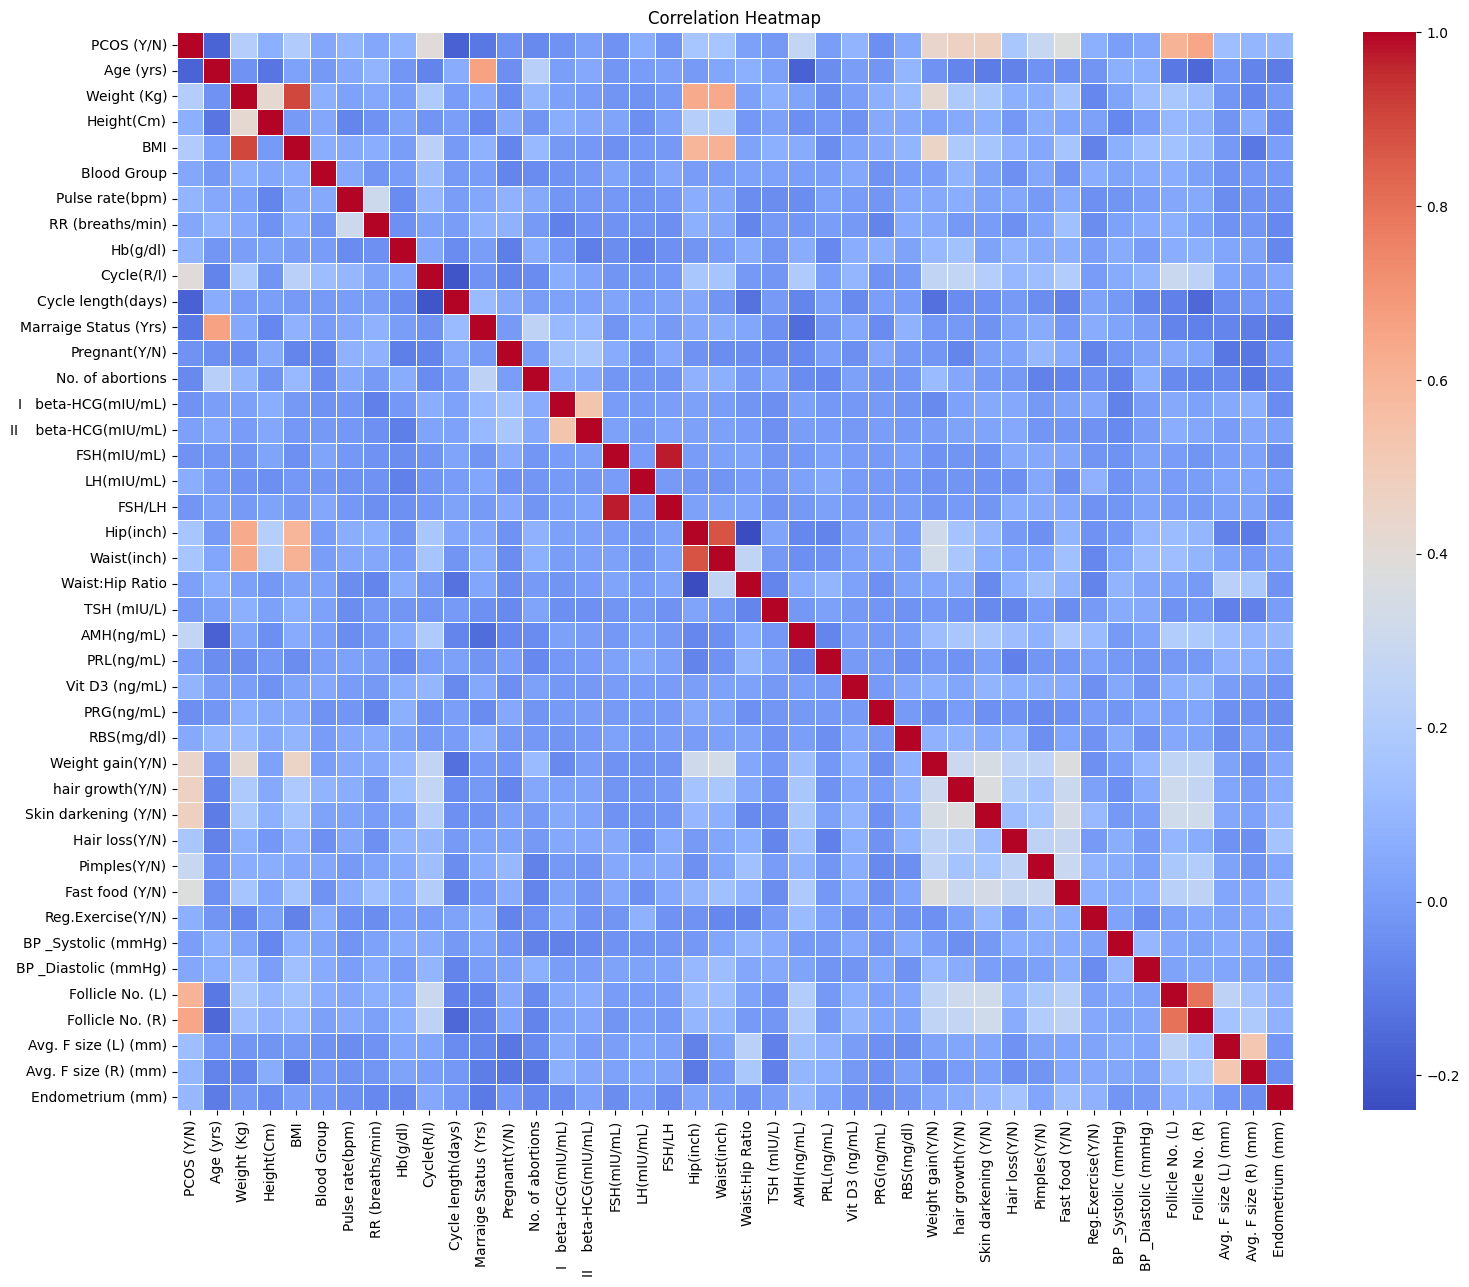

In [125]:
#Correlation heatmap of numeric columns
plt.figure(figsize=(18, 14))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [126]:
#Comparing feature means between PCOS and non-PCOS groups
mean_diff = df.groupby('PCOS (Y/N)').mean().T
mean_diff.columns = ['Non-PCOS', 'PCOS']
mean_diff['Difference'] = mean_diff['PCOS'] - mean_diff['Non-PCOS']

#Displaying top 10 differing features
mean_diff.sort_values('Difference', ascending=False).head(10)


,Non-PCOS,PCOS,Difference
Vit D3 (ng/mL),29.295005,92.322633,63.027627
II beta-HCG(mIU/mL),223.975137,267.554232,43.579094
LH(mIU/mL),2.612676,14.402328,11.789652
Follicle No. (R),4.637363,10.762712,6.125349
Follicle No. (L),4.351648,9.785311,5.433662
Weight (Kg),58.008791,62.985876,4.977084
AMH(ng/mL),4.539184,7.844633,3.305449
RBS(mg/dl),99.203297,101.136723,1.933426
BMI,23.743407,25.467797,1.724390
Hip(inch),37.543956,38.915254,1.371298


<ipython-input-127-ee0e3527b375>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PCOS (Y/N)', y=feature, data=df, inner='box', palette='Set2')
<ipython-input-127-ee0e3527b375>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PCOS (Y/N)', y=feature, data=df, inner='box', palette='Set2')
<ipython-input-127-ee0e3527b375>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PCOS (Y/N)', y=feature, data=df, inner='box', palette='Set2')
<ipython-input-127-ee0e3527b375>:18: FutureWarning: 

Passing `palette` without assigning `hue

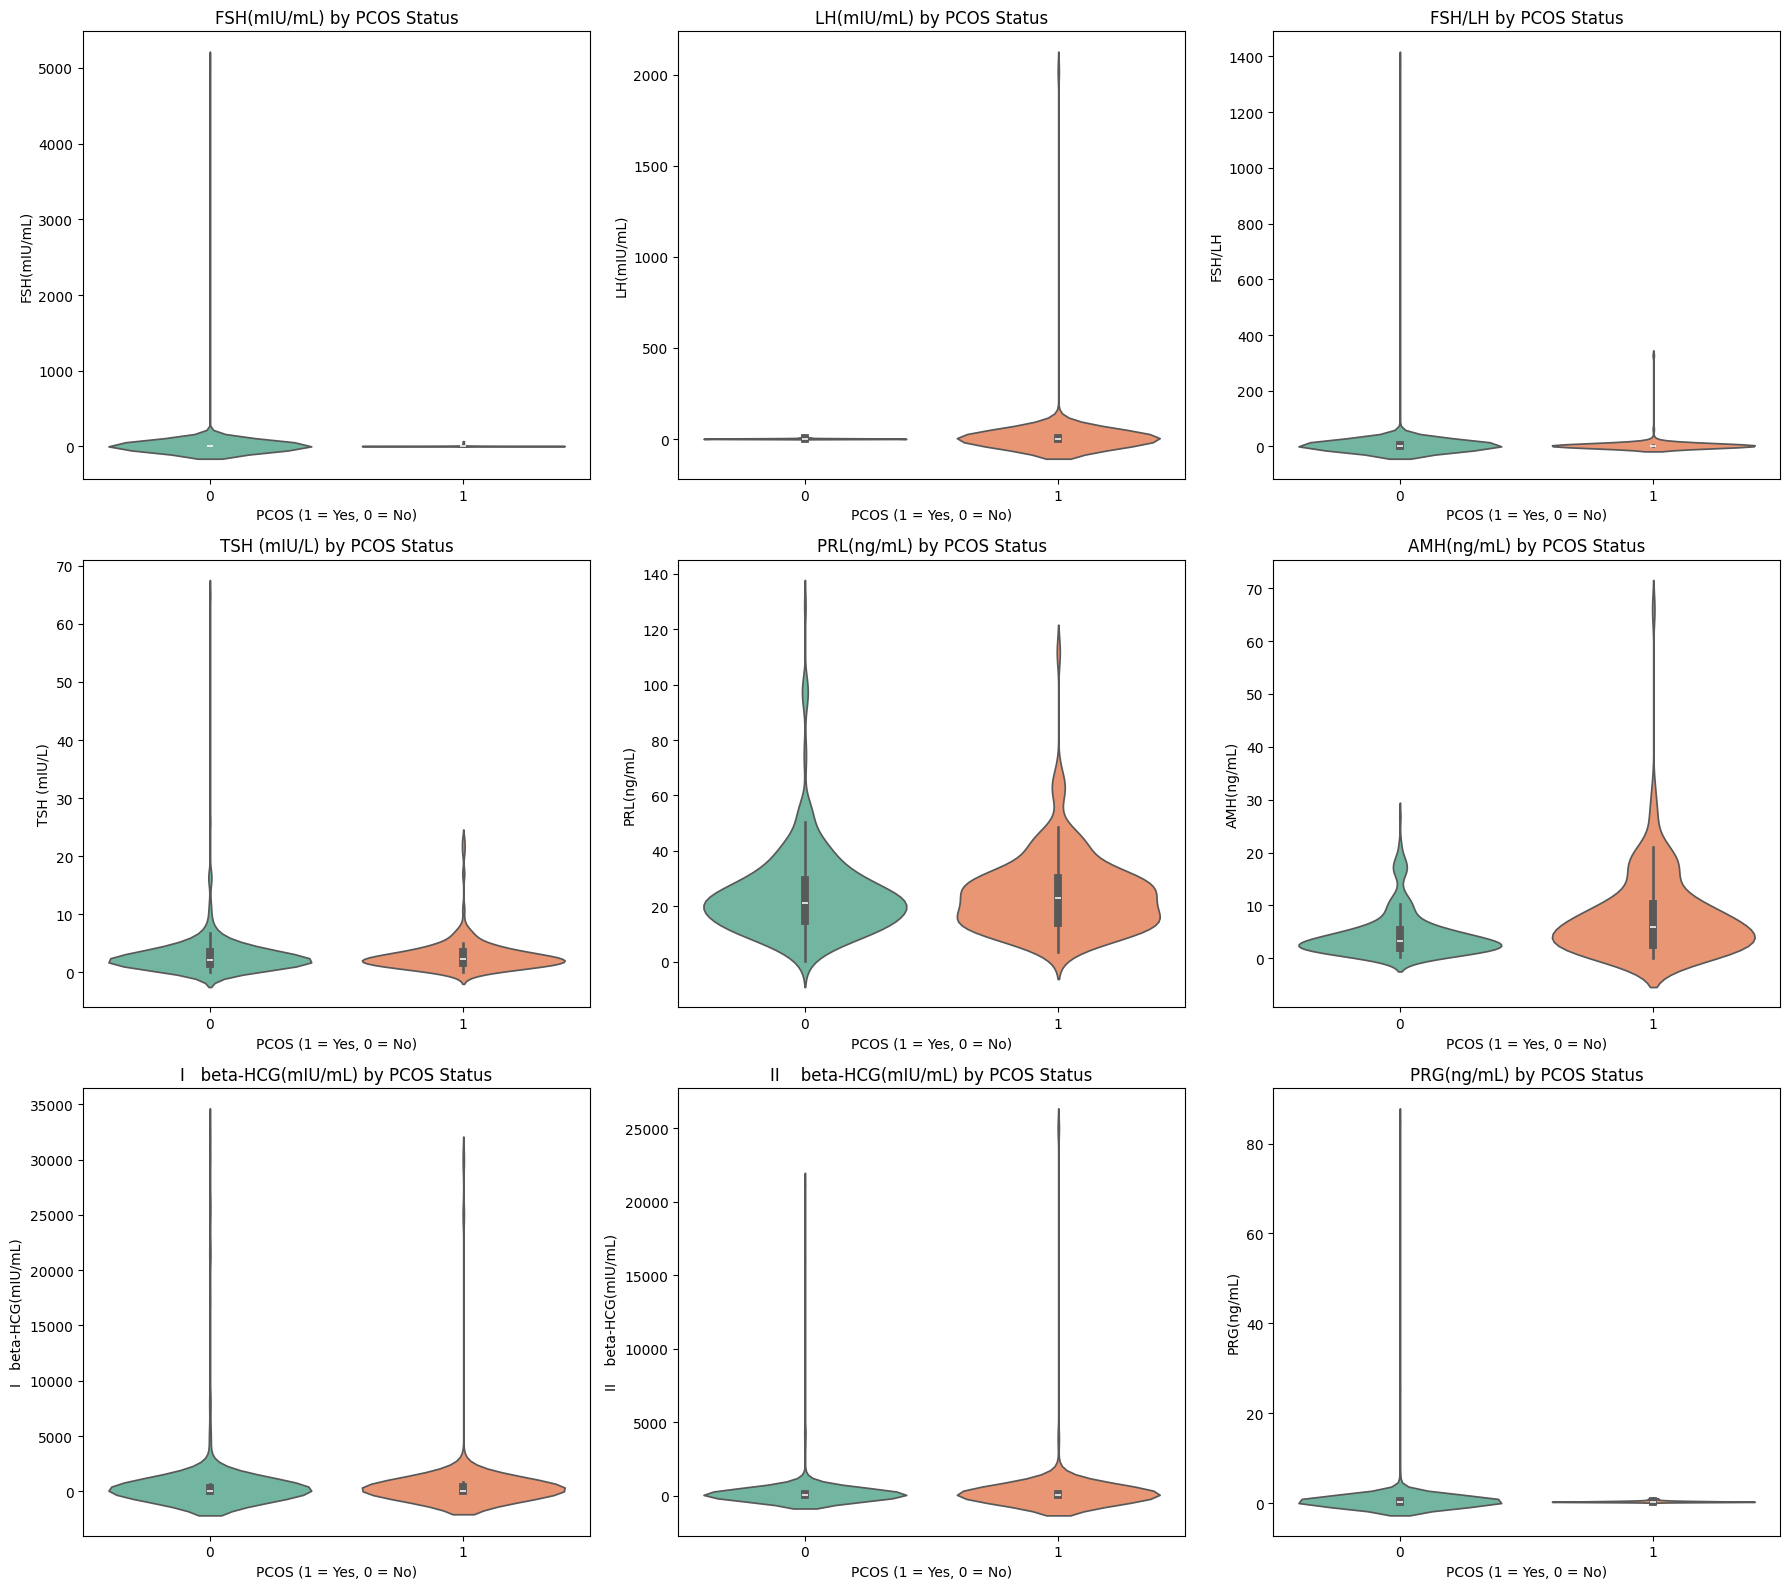

In [127]:
#Key hormone features in the dataset
hormone_features = [
    'FSH(mIU/mL)',
    'LH(mIU/mL)',
    'FSH/LH',
    'TSH (mIU/L)',
    'PRL(ng/mL)',
    'AMH(ng/mL)',
    'I   beta-HCG(mIU/mL)',
    'II    beta-HCG(mIU/mL)',
    'PRG(ng/mL)'
]

#Violin plots for each hormone vs PCOS (Y/N)
plt.figure(figsize=(18, 16))
for i, feature in enumerate(hormone_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='PCOS (Y/N)', y=feature, data=df, inner='box', palette='Set2')
    plt.title(f'{feature} by PCOS Status')
    plt.xlabel('PCOS (1 = Yes, 0 = No)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


<ipython-input-128-7250e91d99a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS (Y/N)', y=feature, data=df, palette='Set3')
<ipython-input-128-7250e91d99a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS (Y/N)', y=feature, data=df, palette='Set3')
<ipython-input-128-7250e91d99a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PCOS (Y/N)', y=feature, data=df, palette='Set3')


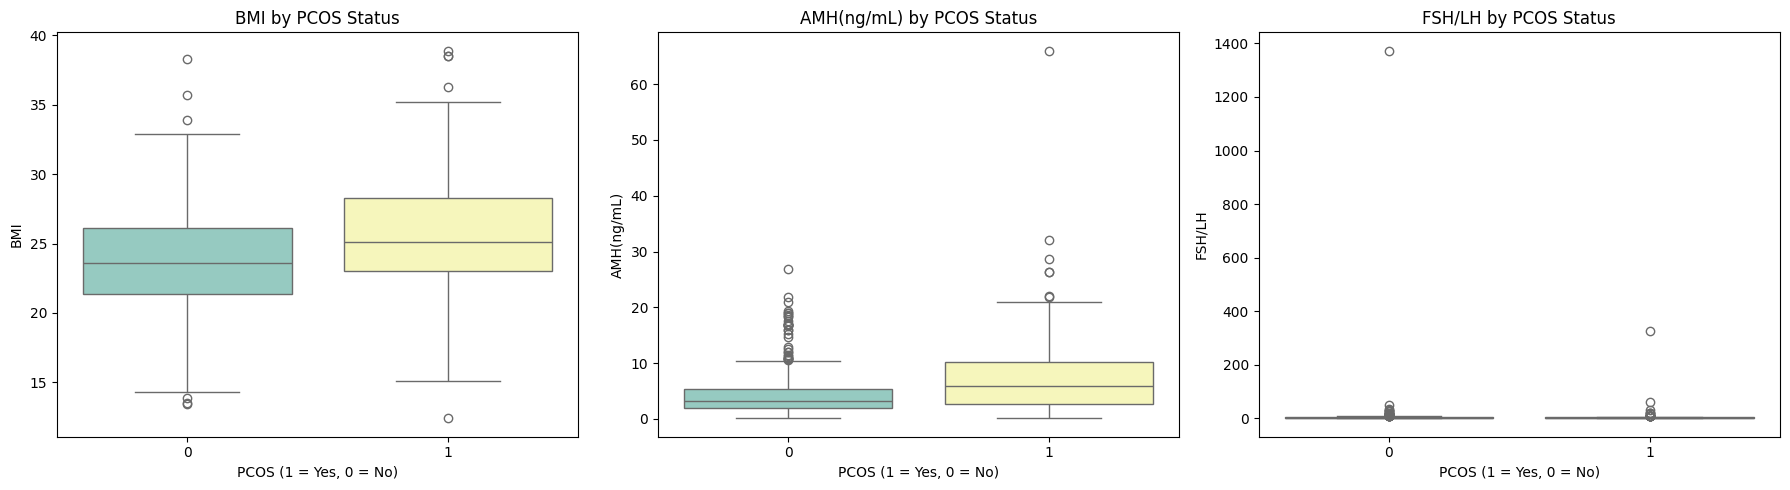

In [128]:
#Boxplots for outlier detection
outlier_features = ['BMI', 'AMH(ng/mL)', 'FSH/LH']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(outlier_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='PCOS (Y/N)', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} by PCOS Status')
    plt.xlabel('PCOS (1 = Yes, 0 = No)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


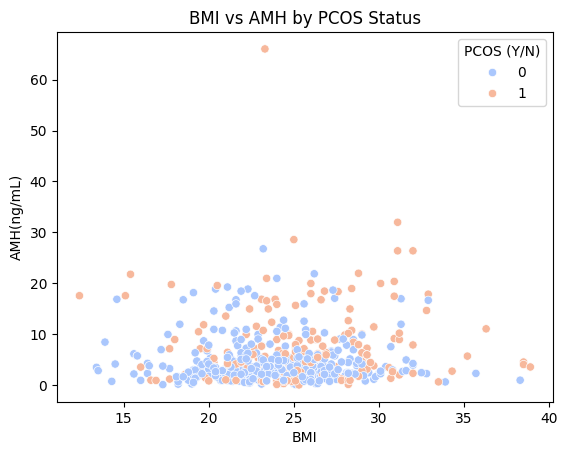

In [129]:
#Scatter Plot: BMI vs AMH(higher BMI correlates with elevated AMH which is a strong PCOS indicator)
sns.scatterplot(x='BMI', y='AMH(ng/mL)', hue='PCOS (Y/N)', data=df, palette='coolwarm')
plt.title('BMI vs AMH by PCOS Status')
plt.show()


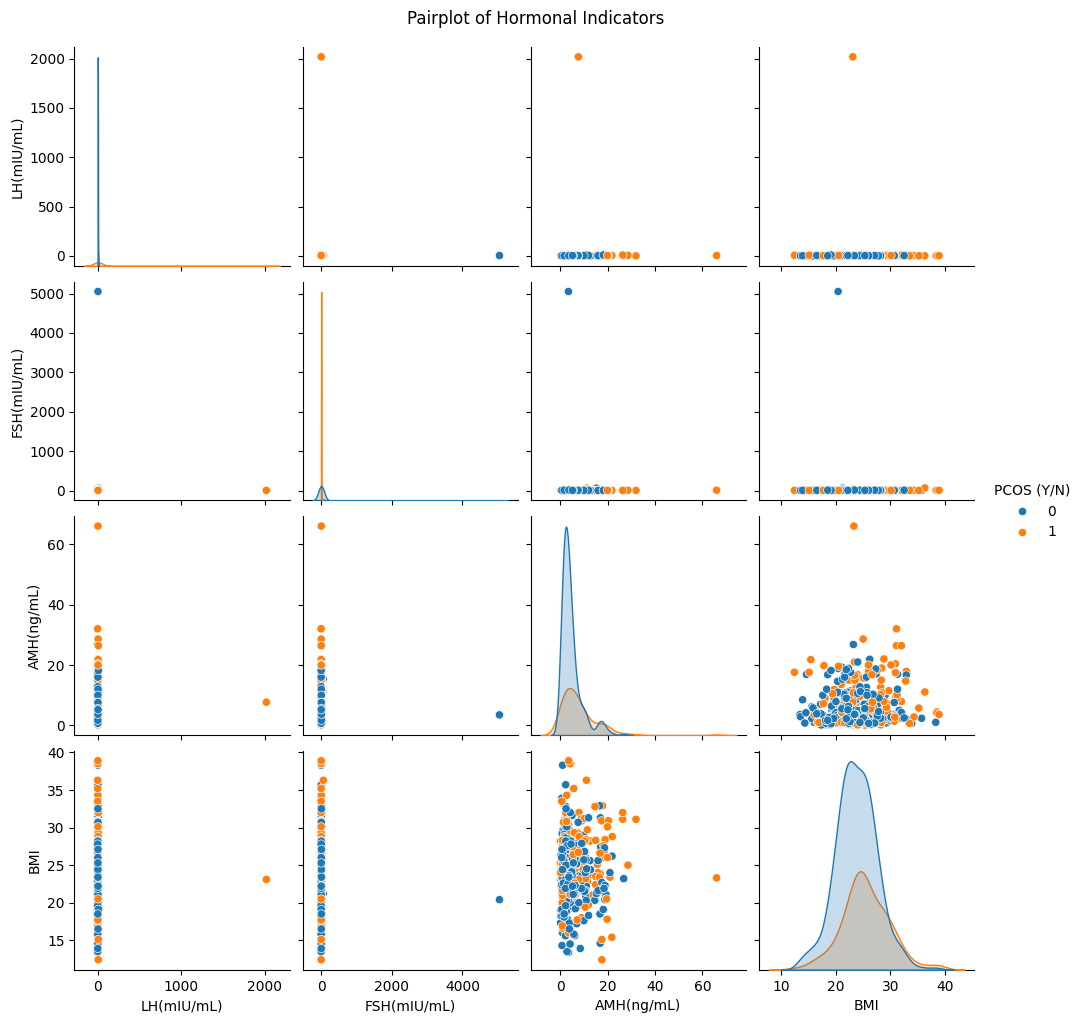

In [130]:
#pairplot of hormonal indicator
sns.pairplot(df[['LH(mIU/mL)', 'FSH(mIU/mL)', 'AMH(ng/mL)', 'BMI', 'PCOS (Y/N)']], hue='PCOS (Y/N)')
plt.suptitle('Pairplot of Hormonal Indicators', y=1.02)
plt.show()


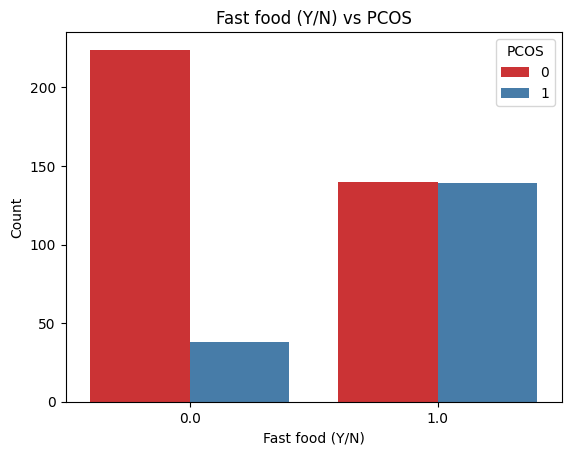

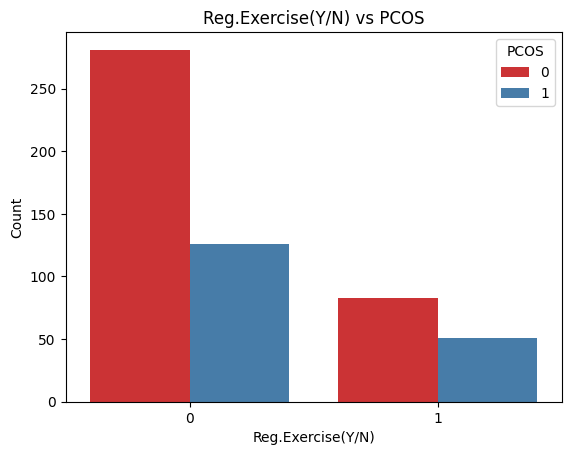

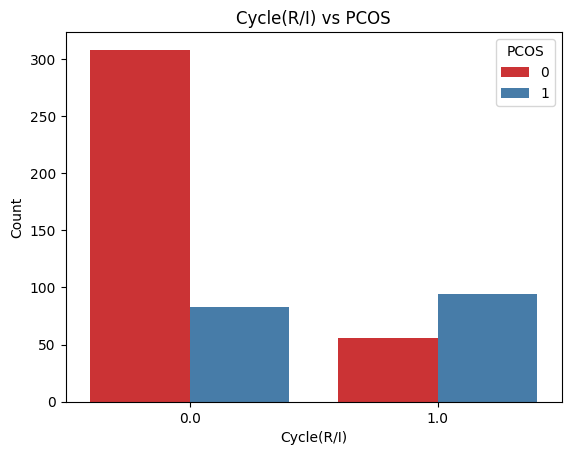

In [131]:
#Lifestyle Impact Analysis
lifestyle_features = ['Fast food (Y/N)', 'Reg.Exercise(Y/N)','Cycle(R/I)']
for feature in lifestyle_features:
    sns.countplot(x=feature, hue='PCOS (Y/N)', data=df, palette='Set1')
    plt.title(f'{feature} vs PCOS')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='PCOS')
    plt.show()



Top 5 features most correlated with PCOS:
 Follicle No. (R)        0.648327
Follicle No. (L)        0.603346
Skin darkening (Y/N)    0.475733
hair growth(Y/N)        0.464667
Weight gain(Y/N)        0.441047
Name: PCOS (Y/N), dtype: float64


<ipython-input-132-a22a3e3ad5fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


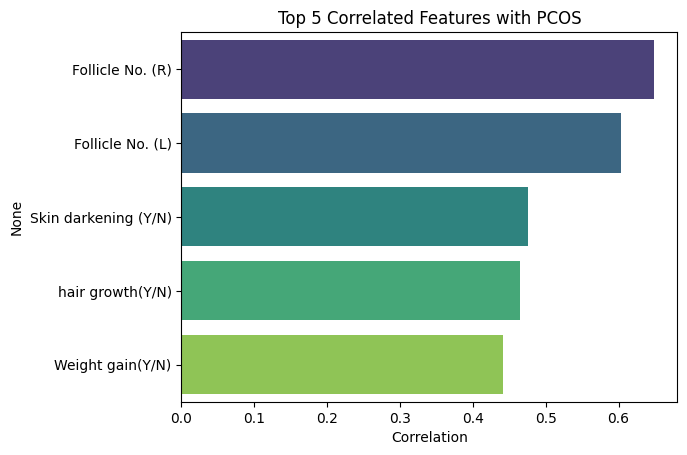

In [132]:
#Top 5 Correlated Features with PCOS
top_corr = df.corr()['PCOS (Y/N)'].abs().sort_values(ascending=False)[1:6]
print("Top 5 features most correlated with PCOS:\n", top_corr)
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 5 Correlated Features with PCOS')
plt.xlabel('Correlation')
plt.show()

In [136]:
df.to_csv('cleaned_PCOS_data.csv', index=False)
